In [1]:
import numpy as np
from scipy import optimize as opt
import matplotlib.pyplot as plt

## Člen

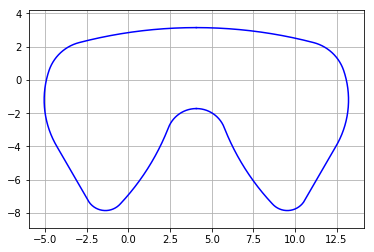

In [43]:
class clen():
    
    def __init__(self, podatki_i):
        ime, self.p, self.f, g1, g2, c, u, y = podatki_i

        # Podatki
        self.alpha_k = 30
        self.alpha_r = np.deg2rad(alpha_k)
        self.a = 0.8567 * self.p
        L = 1.86 * pk
        h1 = 0.33 * pk
        h2 = 0.7 * pk
        h3 = 1.115 * pk

        # Po izbiri
        r0 = 28
        r1 = 2.6
        r2 = 5.5
        r3 = 1.2
        r4 = 14.3
        r5 = 1.8
    
    # Enacbe
    # AB
    def x1(t1, x01):
        return x01 + r0 * np.cos(t1)
    def y1(t1, y01):
        return y01 + r0 * np.sin(t1)
    # BC
    def x2(t2, x02):
        return x02 + r1 * np.cos(t2)
    def y2(t2, y02):
        return y02 + r1 * np.sin(t2)
    # CD
    def x3(t3, x03):
        return x03 + r2 * np.cos(t3)
    def y3(t3, y03):
        return y03 + r2 * np.sin(t3)
    # DE
    def x4(t4, x04):
        return x04 + t4 * np.sin(alpha_r)
    def y4(t4, y04):
        return y04 - t4 * np.cos(alpha_r)
    # EF
    def x5(t5, x05):
        return x05 + r3 * np.cos(t5)
    def y5(t5, y05):
        return y05 + r3 * np.sin(t5)
    # FG
    def x6(t6, x06):
        return x06 + r4 * np.cos(t6)
    def y6(t6, y06):
        return y06 + r4 * np.sin(t6)
    # GH
    def x7(t7, x07):
        return x07 + r5 * np.cos(t7)
    def y7(t7, y07):
        return y07 + r5 * np.sin(t7)
    
    # Sistem enacb
    def enacbe(priblizki):
        t1A, t1B, t2B, t2C, t3C, t3D, t4D, t4E, t5E, t5F, t6F, t6G, t7G, t7H, x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07 = priblizki
        # Zveznost x: 6
        e1 = x2(t2B, x02) - x1(t1B, x01)
        e2 = x3(t3C, x03) - x2(t2C, x02)
        e3 = x4(t4D, x04) - x3(t3D, x03)
        e4 = x5(t5E, x05) - x4(t4E, x04)
        e5 = x6(t6F, x06) - x5(t5F, x05)
        e6 = x7(t7G, x07) - x6(t6G, x06)
        # Zveznost y: 6
        e7 = y2(t2B, y02) - y1(t1B, y01)
        e8 = y3(t3C, y03) - y2(t2C, y02)
        e9 = y4(t4D, y04) - y3(t3D, y03)
        e10 = y5(t5E, y05) - y4(t4E, y04)
        e11 = y6(t6F, y06) - y5(t5F, y05)
        e12 = y7(t7G, y07) - y6(t6G, y06)
        # Odvodi: 8
        e13 = np.pi / 2 - t1A
        e14 = t2B - t1B
        e15 = t3C - t2C
        e16 = np.pi + alpha_r - t3D
        e17 = t3D - t5E
        e18 = t6F - t5F
        e19 = t7G - np.pi - t6G
        e20 = np.pi / 2 - t7H
        # Ostalo: 8
        e21 = 0.5 * a - x1(t1A, x01)
        e22 = h1 - y1(t1A, y01)
        e23 = 0.5 * a - 0.5 * L - x3(t3C, x03)
        e24 = - f * np.cos(alpha_r) - x4(t4D, x04)
        e25 = - f * np.sin(alpha_r) - y4(t4D, x04)
        e26 = h1 - h3 - y5(t5F, y05)
        e27 = h1 - h2 - y07
        e28 = 0.5 * a - x7(t7H, x07)
        return (e1, e2, e3, e4, e5, e6, e7, e8, e9, e10, e11, e12, e13, e14, e15, e16, e17, e18, e19, e20, e21, e22, e23, e24, e25, e26, e27, e28)

    # Resevanje
    zac_priblizki = np.ones(28)
    resitev = list(opt.fsolve(enacbe, zac_priblizki))

    # +- 2 * pi, da dobmo prave dele kroga
    for i, element in enumerate(resitev):
        if i < 14 and (i != 7 or i != 8):
            if element > 2 * np.pi:
                resitev[i] = element - 2 * int(element / (2 * np.pi)) * np.pi
            elif - element > 2 * np.pi:
                resitev[i] = element + 2 * int(-element / (2 * np.pi)) * np.pi
            if i % 2 == 1 and i < 12:
                if resitev[i] < resitev[i - 1]:
                    resitev[i] += 2 * np.pi
    if resitev[13] > 2 * np.pi:
        resitev[13] -= 2 * np.pi
    if resitev[13] > resitev[12]:
        resitev[12] += 2 * np.pi

    t1A, t1B, t2B, t2C, t3C, t3D, t4D, t4E, t5E, t5F, t6F, t6G, t7G, t7H, x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07 = resitev
    
    # Zbiranje rezultatov in plot
    
    st_t_c = 100 # Število_točk_člen -> število točk, ki jih uporabim na posamezni krivulji
    tocke_clen_x = []
    tocke_clen_y = []
    funkcije = [x1, y1, x2, y2, x3, y3, x4, y4, x5, y5, x6, y6, x7, y7]
    konst = [x01, y01, x02, y02, x03, y03, x04, y04, x05, y05, x06, y06, x07, y07]
    for i in range(0, 14, 2):
        zac, kon = resitev[i], resitev[i+1]
        t = np.linspace(zac, kon, st_t_c)
        for x in funkcije[i](t, konst[i]):  # Doda posamezen x na skupni seznam tocke_clen_x
            tocke_clen_x.append(x)
        for y in funkcije[i+1](t, konst[i+1]):  # Doda posamezen y na skupni seznam tocke_clen_y
            tocke_clen_y.append(y)

    tocke_clen_x = np.array(tocke_clen_x)
    tocke_clen_y = np.array(tocke_clen_y)
    plt.plot(tocke_clen_x, tocke_clen_y, 'b')
    plt.plot(-tocke_clen_x + a, tocke_clen_y, 'b')
    plt.axis('equal')
    plt.grid()
    plt.show()

In [44]:
clen(podatki[0])

4.9978644352


### Vrtenje člena

In [7]:
def obrni(seznam_x, seznam_y, kot):  # kot v rad
    nov_seznam_x = []
    nov_seznam_y = []
    for x_z, y_z in zip(seznam_x, seznam_y):  # x_zacetni, y_zacetni
        x_n = x_z * np.cos(kot) - y_z * np.sin(kot)  # novi x
        y_n = x_z * np.sin(kot) + y_z * np.cos(kot)  # novi y
        nov_seznam_x.append(x_n)
        nov_seznam_y.append(y_n)
    return (np.array(nov_seznam_x), np.array(nov_seznam_y))

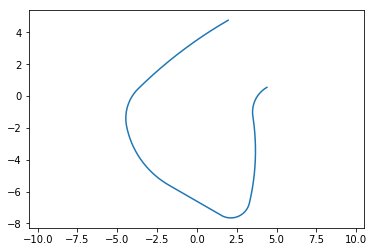

In [8]:
# Preizkus vrtenja
obrnjen_x, obrnjen_y = obrni(tocke_clen_x, tocke_clen_y, np.pi/6)
plt.plot(obrnjen_x, obrnjen_y)
plt.axis('equal')
plt.show()

### Verižnik - Typ nach DIN 8190

In [28]:
# http://www.otvinta.com/gear.html
# predloga strojni elementi 2
# http://jamesgregson.blogspot.com/2012/05/python-involute-spur-gear-script.html

In [29]:
# Oblika [ime, p, f, g1, g2, 2c, u, y]
podatki = [['06', 9.525, 3.76, 10.9, 6.7, 3, 9, 0.6],
           ['08', 12.7, 5.085, 14.45, 8.7, 4.2, 12.6, 0.6],
           ['12', 19.05, 7.44, 21, 10.7, 1.3, 15, 0.5],
           ['16', 25.4, 10.04, 27.7, 14, 1.8, 20, 0.5],
           ['24', 38.1, 14.95, 41, 21, 2.8, 30, 0.5],
           ['32', 50.8, 19.93, 55, 28, 3.6, 40, 0.5]]

In [36]:
'''def kroznica_izris(r, phi_z, phi_k):
    st = 30
    return(r * np.cos(np.linspace(phi_z, phi_k, st)), r * np.sin(np.linspace(phi_z, phi_k, st)))'''

def f_x_evolventa(a, u):
    return a * (np.cos(u) + u * np.sin(u))

def f_y_evolventa(a, u):
    return a * (np.sin(u) - u * np.cos(u))

def veriznik(podatki_i, z):
    ime, p, f, g1, g2, c, u, y = podatki_i
    
    razdelni_premer = (z * p) / np.pi
    osnovni_premer = razdelni_premer * np.cos(alpha_r)
    addendum = 1 * p / np.pi
    dedendum = 1.25 * p / np.pi
    zunanji_premer = razdelni_premer + 2 * addendum
    krozni_korak = p / (razdelni_premer / 2)
    zracnost = 0.05  # zračnost - luknja in zob na razdelnem krogu nista točno 1/2, ampak je zob malo ožji
    krozna_debelina_zoba = p / (2 + zracnost)
    krozni_kot_zoba = krozna_debelina_zoba / (razdelni_premer / 2)
    
    u = 0
    r_trenutni = 0
    x_evo0 = [f_x_evolventa(osnovni_premer / 2, u)]
    y_evo0 = [f_y_evolventa(osnovni_premer / 2, u)]
    while r_trenutni < zunanji_premer / 2:
        napaka = 0.0001  # korak po katerem se pomika cez točke
        u += napaka
        x_trenutni = f_x_evolventa(osnovni_premer / 2, u)
        y_trenutni = f_y_evolventa(osnovni_premer / 2, u)
        x_evo0.append(x_trenutni)
        y_evo0.append(y_trenutni)
        r_trenutni = np.sqrt(x_trenutni ** 2 + y_trenutni ** 2)
        if abs(r_trenutni - razdelni_premer / 2) <= ((razdelni_premer - osnovni_premer) / 2) / len(x_evo0):
            xy_razdelni = (x_trenutni, y_trenutni)
            
    zeljeno_stevilo_tock = 50
    korak_po_tockah = int(len(x_evo0) / zeljeno_stevilo_tock) + 1
    x_evo1 = x_evo0[::korak_po_tockah]
    y_evo1 = y_evo0[::korak_po_tockah]
    
    phi = np.arctan(xy_razdelni[1] / xy_razdelni[0])    
    x_evo1a, y_evo1a = obrni(x_evo1, y_evo1, -phi)
    
    y_evo1_z = -y_evo1a  # zrcalno
    x_evo2, y_evo2 = obrni(x_evo1a, y_evo1a, - krozni_kot_zoba / 2)
    x_evo2_z, y_evo2_z = obrni(x_evo1a, y_evo1_z, krozni_kot_zoba / 2)
    x_evo2_v = np.zeros(zeljeno_stevilo_tock) + x_evo2[-1]  # vmes
    y_evo2_v = np.linspace(y_evo2_z[-1], y_evo2[-1], zeljeno_stevilo_tock)
    
    xz11, yz11 = obrni(x_evo2_z, y_evo2_z, np.pi / 2 + krozni_korak)
    xz12, yz12 = obrni(x_evo2_v, y_evo2_v, np.pi / 2 + krozni_korak)
    xz13, yz13 = obrni(x_evo2[::-1], y_evo2[::-1], np.pi / 2 + krozni_korak)
    
    xz21, yz21 = obrni(x_evo2_z, y_evo2_z, np.pi / 2)
    xz22, yz22 = obrni(x_evo2_v, y_evo2_v, np.pi / 2)
    xz23, yz23 = obrni(x_evo2[::-1], y_evo2[::-1], np.pi / 2)
    
    xz31, yz31 = obrni(x_evo2_z, y_evo2_z, np.pi / 2 - krozni_korak)
    xz32, yz32 = obrni(x_evo2_v, y_evo2_v, np.pi / 2 - krozni_korak)
    xz33, yz33 = obrni(x_evo2[::-1], y_evo2[::-1], np.pi / 2 - krozni_korak)
    
    xz = np.array([[xz11, xz12, xz13],
                   [xz21, xz22, xz23],
                   [xz31, xz32, xz33]])
    
    yz = np.array([[yz11, yz12, yz13],
                   [yz21, yz22, yz23],
                   [yz31, yz32, yz33]])
    
    return(xz, yz)

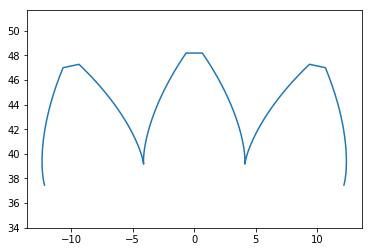

In [35]:
xz, yz = tvori_veriznik(podatki[0], 30)
plt.plot(xz.flatten(), yz.flatten())
plt.axis('equal')
plt.show()

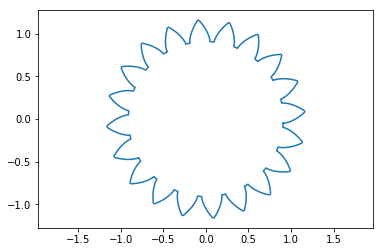

In [20]:
from gears import*
p = 9.525
pa = 30
z= 20
x,y = gears_make_gear(pa, z, p)
plt.plot(x,y)
plt.axis('equal')
plt.show()

## Zobnik in člen

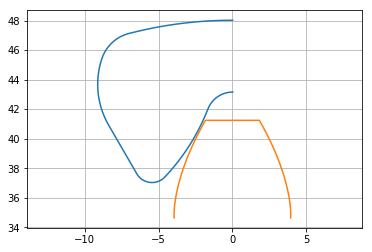

In [16]:
# Začetni položaj
# Premik člena
x_clen = tocke_clen_x - 0.5 * a
y_premik = - min(tocke_clen_y) + d / 2 - 1.4 * m  # Zadnje 1.4 ne sme biti
y_clen = tocke_clen_y + y_premik

# Zasuk zoba
x_zob, y_zob = obrni(x_zob0, y_zob0, np.pi / 2)

# Odseki za izračune
x_clen_rac = x_clen[5 * st_t_c: 6 * st_t_c + 1]
y_clen_rac = y_clen[5 * st_t_c: 6 * st_t_c + 1]
x_zob_rac = x_zob[: st_t_z + 1]  # enega več vzamem, le zato,
# da z računanjem zadnjega koraka v for zanki, ni treba izpustiti zadnjega člena
y_zob_rac = y_zob[: st_t_z]

# Iskanje začetne zračnosti
min_razdalja = None
for i, (x_c, y_c) in enumerate(zip(x_clen_rac, y_clen_rac)):
    for j, (x_z, y_z) in enumerate(zip(x_zob_rac[:-2], y_zob_rac)):
        razdalja = x_z - x_c
        if abs(y_z - y_c) <= 2 * abs(y_zob_rac[j + 1] - y_z) and (min_razdalja == None or razdalja < min_razdalja[-1]):
            min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]

# Če je števec enak 0 je vzelo le prvo točko - ni več skupne točke - prenehaj obravnavo

# Nastavitev na točen začetek
x_clen += min_razdalja[-1]

plt.plot(x_clen, y_clen)
plt.plot(x_zob, y_zob)
plt.axis('equal')
plt.grid()
plt.show()

# Pripenjanje v skupni seznam
x_cs = []
y_cs = []
x_zs = []
y_zs = []
razdalja_s = []

x_cs.append(min_razdalja[2] + min_razdalja[-1])
y_cs.append(min_razdalja[3])
x_zs.append(min_razdalja[4])
y_zs.append(min_razdalja[5])
razdalja_s.append(np.sqrt((x_cs[-1] - x_zs[-1]) ** 2 + (y_cs[-1] - y_zs[-1]) ** 2))

### Analiza

In [19]:
x_clen = x_clen_rac[:]
y_clen = y_clen_rac[:]
x_zob = x_zob_rac[:]
y_zob = y_zob_rac[:]

korak = np.pi / 100

while True:  # Ustavi ga "break"
    
    # Obrnemo zobnik
    x_zob, y_zob = obrni(x_zob, y_zob, -korak)
    # kot_absolutni -= korak
    
    x_clen_rac = x_clen[5 * st_t_c: 6 * st_t_c + 1]
    y_clen_rac = y_clen[5 * st_t_c: 6 * st_t_c + 1]
    x_zob_rac = x_zob[: st_t_z + 1]  # enega več vzamem, le zato,
    # da z računanjem zadnjega koraka v for zanki, ni treba izpustiti zadnjega člena
    y_zob_rac = y_zob[: st_t_z]
   
    # Iskanje začetne zračnosti
    min_razdalja = None
    stevec = -1
    for i, (x_c, y_c) in enumerate(zip(x_clen_rac, y_clen_rac)):
        for j, (x_z, y_z) in enumerate(zip(x_zob_rac[:-2], y_zob_rac)):
            razdalja = x_z - x_c
            if abs(y_z - y_c) <= 2 * abs(y_zob_rac[j + 1] - y_z) and (min_razdalja == None or razdalja < min_razdalja[-1]):        
                stevec +=1
                min_razdalja = [i, j, x_c, y_c, x_z, y_z, razdalja]

    # Če je števec enak 0 je vzelo le prvo točko - ni več skupne točke - prenehaj obravnavo
    if stevec == 0:
        break
        
    # Nastavitev na točen začetek
    x_clen += min_razdalja[-1]
    
    plt.plot(x_clen, y_clen)
    plt.plot(x_zob, y_zob)
    plt.axis('equal')
    plt.grid()
    plt.show()

    # Pripenjanje v skupni seznam
    x_cs.append(min_razdalja[2] + min_razdalja[-1])
    y_cs.append(min_razdalja[3])
    x_zs.append(min_razdalja[4])
    y_zs.append(min_razdalja[5])
    razdalja_s.append(np.sqrt((x_cs[-1] - x_zs[-1]) ** 2 + (y_cs[-1] - y_zs[-1]) ** 2))

TypeError: 'NoneType' object is not subscriptable